In [104]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
from prettytable import PrettyTable



In [141]:
df = pd.read_csv("bydegree.csv")
df.head()
df = df.assign(Male = np.where(df['female'] == 0,1, 0))
sex_map = {
    0: "M",
    1: "F"
}
df['SEX'] = df['female'].map(sex_map)

In [37]:
# #Hispanic
# df['hisp'] = 0
# df.loc[(df.hispanic == 1), 'hisp'] = 1
# # White non-hispanic people
# df['white'] = 0
# df.loc[(df.race == 1) & (df.hispanic == 0 ),'white'] = 1
# #Black non-hispanic people
# df['black'] = 0
# df.loc[(df.race == 2) & (df.hispanic == 0), 'black'] = 1
# #asian non-hispanic people
# df['asian'] = 0
# df.loc[(df.race == 3) & (df.hispanic == 0), 'asian'] = 1
# #other non-hispanic people
# df['other'] = 0
# df.loc[(df.race == 4) & (df.hispanic == 0), 'other'] = 1

In [38]:
df = df.assign(\
        white = \
        np.where((df['race'] == 1) & (df['hispanic'] == 0), 1, 0),
         b_nonhisp =\
        np.where((df['race'] == 2) & (df['hispanic'] == 0), 1, 0),
         a_nonhisp = \
        np.where((df['race'] == 3) & (df['hispanic'] == 0), 1, 0),
         o_nonhisp = \
            np.where((df['race'] == 4) & (df['hispanic'] == 0), 1, 0))




In [39]:
conditions = [(df['hispanic'] == 1),
              (df['b_nonhisp'] == 1),
              (df['white'] == 1),
              (df['a_nonhisp'] == 1),
              (df['o_nonhisp'] == 1)]

choices = ['Hispanic',"Black Non-hispanic", "White Non-hispanic",\
           "Asian Non-hispanic","Other Non-hispanic"]
df = df.assign(race_var = np.select(conditions,choices))

In [40]:
df['Sex'] = np.where(df.female == 1, "Female", "Male")

In [41]:
fem_Q1p1 = [df.loc[df["hispanic"] == 1].female.describe()[1],
            df.loc[df["b_nonhisp"] == 1].female.describe()[1],
            df.loc[df["white"] == 1].female.describe()[1],
            df.loc[df["a_nonhisp"] == 1].female.describe()[1],
            df.loc[df["o_nonhisp"] == 1].female.describe()[1]]


In [42]:
Ethnicity = ["Hispanic","Black Non-Hispanic", "White Non-Hispanic", "Asian Non-Hispanic", "Other Non-Hispanic"]
col = {"Female.Percentage": fem_Q1p1}

Q1p1 = pd.DataFrame(col)
Q1p1["Male.Percentage"] = 1 - Q1p1['Female.Percentage']
Q1p1.index = Ethnicity
Q1p1['Ethnicity'] = Q1p1.index

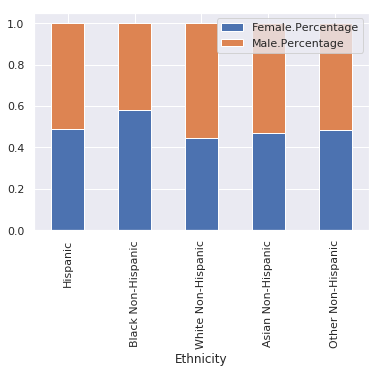

In [43]:
sns.set()
Q1p1.set_index('Ethnicity').plot(kind='bar', stacked=True)

In [159]:
Q2a = df.pivot_table( values = 'female', index = 'mfield',aggfunc= 'sum')

Q2a = Q2a.join(df.pivot_table(values = 'Male', index = 'mfield',aggfunc= 'sum'), on = Q2a.index)

Q2a['female'] = Q2a['female'] / df.female.sum()
Q2a['Male'] = Q2a['Male'] / df.Male.sum()






In [160]:
log_wage = df.pivot_table(values = 'logwage',columns = "SEX",\
                          index = 'mfield', aggfunc = 'mean')
log_wage.columns = ['Female_logwage', 'Male_logwage']
Q2a = Q2a.join(log_wage, on = Q2a.index)
Q2a


,female,Male,Female_logwage,Male_logwage
mfield,,,,
1,0.070663,0.050919,7.015018,7.108538
2,0.030315,0.086712,7.169401,7.340410
3,0.106942,0.035952,6.770255,6.888829
4,0.024072,0.128339,7.323996,7.397082
5,0.122845,0.100042,6.968322,7.197572
6,0.260258,0.277531,7.072464,7.229572
7,0.071781,0.090619,6.993337,7.089232
8,0.117658,0.095581,6.920830,7.053048
9,0.105389,0.021909,7.193518,7.319011


In [162]:
Q2a['gap'] = Q2a.Male_logwage - Q2a.Female_logwage

,female,Male,Female_logwage,Male_logwage,gap
mfield,,,,,
1,0.070663,0.050919,7.015018,7.108538,0.093520
2,0.030315,0.086712,7.169401,7.340410,0.171009
3,0.106942,0.035952,6.770255,6.888829,0.118574
4,0.024072,0.128339,7.323996,7.397082,0.073086
5,0.122845,0.100042,6.968322,7.197572,0.229249
6,0.260258,0.277531,7.072464,7.229572,0.157107
7,0.071781,0.090619,6.993337,7.089232,0.095895
8,0.117658,0.095581,6.920830,7.053048,0.132218
9,0.105389,0.021909,7.193518,7.319011,0.125493


In [ ]:
female